 # World 2 - Tree Top City

This involves the following steps for two assessments:

>1.Import and Read data<br>
>2.Calculating Number of Session<br>
>3.Calculating Game time of Session<br>
>4.Calculating Game time per Session<br>
>5.Removing Outliers<br>


## Import and Read data

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1) 


In [146]:
df=pd.read_csv('../data/treetopcity.csv')
score=pd.read_csv('../data/treetopcity_score.csv')

In [147]:
print(df.shape)
print(score.shape)

(2304179, 11)
(6503, 7)


In [148]:
df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,d3ffed2d2d77597d,2019-08-06T05:07:33.207Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Tree Top City - Level 1,Clip,TREETOPCITY
1,27253bdc,e882eb6760063bb1,2019-08-06T05:07:58.484Z,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Ordering Spheres,Clip,TREETOPCITY
2,b7dc8128,75e40170dea0bd21,2019-08-06T05:09:10.506Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",0006a69f,1,2000,0,All Star Sorting,Game,TREETOPCITY
3,4b5efe37,75e40170dea0bd21,2019-08-06T05:09:13.298Z,"{""coordinates"":{""x"":449,""y"":637,""stage_width"":1015,""stage_height"":762},""round"":0,""event_count"":2,""game_time"":2810,""event_code"":4010}",0006a69f,2,4010,2810,All Star Sorting,Game,TREETOPCITY
4,2c4e6db0,75e40170dea0bd21,2019-08-06T05:09:14.934Z,"{""houses"":[4,3,2],""dinosaurs"":[{""name"":""don"",""size"":3},{""name"":""stacey"",""size"":4},{""name"":""petey"",""size"":2}],""round"":1,""event_count"":3,""game_time"":4443,""event_code"":2020}",0006a69f,3,2020,4443,All Star Sorting,Game,TREETOPCITY


In [149]:
score.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304179 entries, 0 to 2304178
Data columns (total 11 columns):
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
dtypes: int64(3), object(8)
memory usage: 193.4+ MB


In [151]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6503 entries, 0 to 6502
Data columns (total 7 columns):
game_session       6503 non-null object
installation_id    6503 non-null object
title              6503 non-null object
num_correct        6503 non-null int64
num_incorrect      6503 non-null int64
accuracy           6503 non-null float64
accuracy_group     6503 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 355.8+ KB


In [152]:
df.isnull().sum()

event_id           0
game_session       0
timestamp          0
event_data         0
installation_id    0
event_count        0
event_code         0
game_time          0
title              0
type               0
world              0
dtype: int64

In [153]:
score.isnull().sum()

game_session       0
installation_id    0
title              0
num_correct        0
num_incorrect      0
accuracy           0
accuracy_group     0
dtype: int64

In [154]:
#converting the timestamp column into timestamp format
df['timestamp']=pd.to_datetime(df['timestamp'])

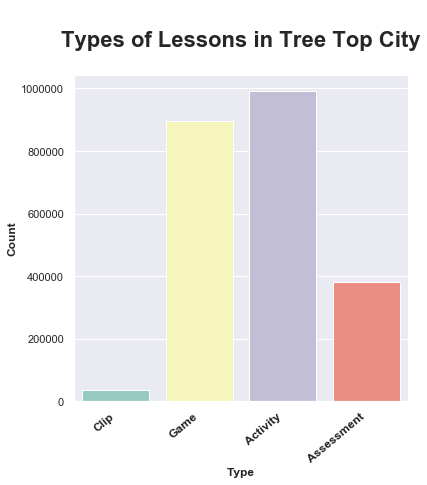

In [155]:
# types of lessons in this world
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
ax=sns.countplot(df['type'],palette="Set3")
plt.title('\nTypes of Lessons in Tree Top City\n',
         fontdict= {
        'weight' : 'bold',
        'size'   : 22});
plt.xlabel('Type',fontdict= {
        'weight' : 'bold',
        'size'   : 12})
plt.ylabel('Count',fontdict= {
        'weight' : 'bold',
        'size'   : 12});# number of gane sessions in this dataframe
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict= {
        'weight' : 'bold',
        'size'   : 12});

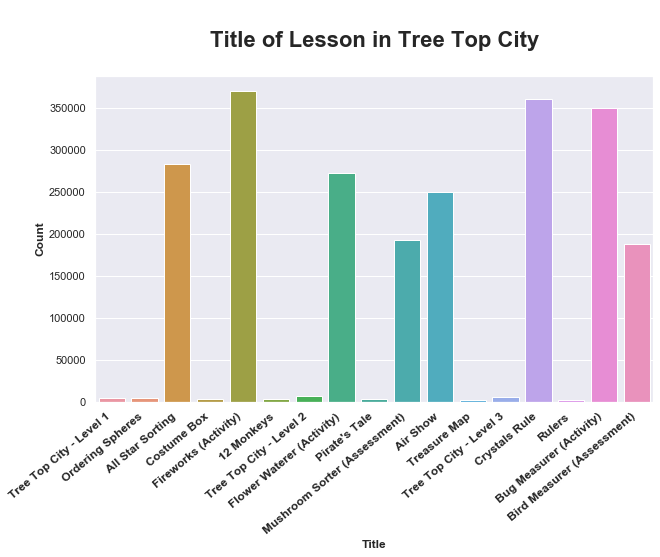

In [156]:
#title of each lesson in this world
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
plt.title('\nTitle of Lesson in Tree Top City\n',
         fontdict= {
        'weight' : 'bold',
        'size'   : 22})
ax=sns.countplot(df['title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict= {
        'weight' : 'bold',
        'size'   : 12});
plt.xlabel('Title',fontdict= {
        'weight' : 'bold',
        'size'   : 12})
plt.ylabel('Count',fontdict= {
        'weight' : 'bold',
        'size'   : 12}); # number of sessions played by user

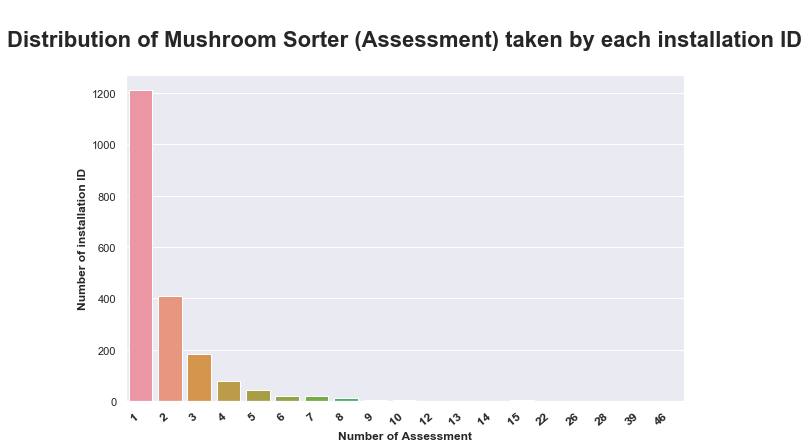

In [157]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))

ax=sns.countplot(score[score['title']=='Mushroom Sorter (Assessment)'].groupby('installation_id').game_session.nunique().sort_values());
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict= {
        'weight' : 'bold',
        'size'   : 12});
plt.title('\nDistribution of Mushroom Sorter (Assessment) taken by each installation ID\n',
          fontdict= {
        'weight' : 'bold',
        'size'   : 22})
plt.xlabel('Number of Assessment',fontdict= {
        'weight' : 'bold',
        'size'   : 12})
plt.ylabel('Number of installation ID',fontdict= {
        'weight' : 'bold',
        'size'   : 12});


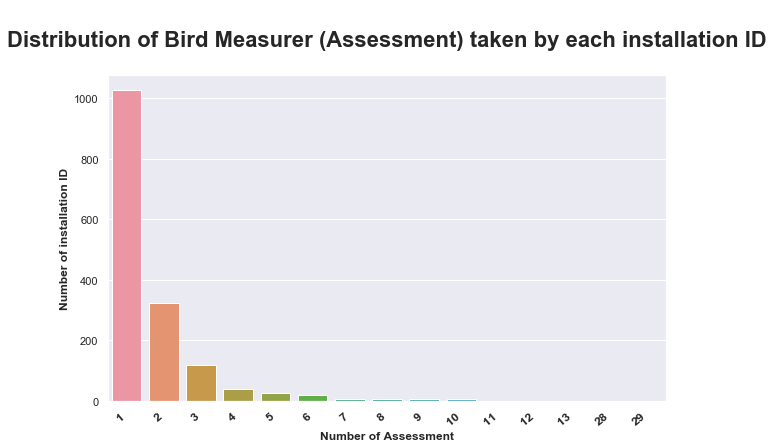

In [158]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))

ax=sns.countplot(score[score['title']=='Bird Measurer (Assessment)'].groupby('installation_id').game_session.nunique().sort_values());
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict= {
        'weight' : 'bold',
        'size'   : 12});
plt.title('\nDistribution of Bird Measurer (Assessment) taken by each installation ID\n',
          fontdict= {
        'weight' : 'bold',
        'size'   : 22})
plt.xlabel('Number of Assessment',fontdict= {
        'weight' : 'bold',
        'size'   : 12})
plt.ylabel('Number of installation ID',fontdict= {
        'weight' : 'bold',
        'size'   : 12});

***Dividing the treetopcity score dataframe into two based on assessments***

In [159]:
# creating a new database only with bird measurer assessment
score_bm=score[score['title']=='Bird Measurer (Assessment)']
score_bm.shape

(2746, 7)

In [160]:
score_bm['installation_id'].nunique()

1587

In [161]:
# creating a new database only with Mushroom Sorter assessment
score_ms=score[score['title']=='Mushroom Sorter (Assessment)']
score_ms.shape

(3757, 7)

In [162]:
score_ms['installation_id'].nunique()

1990

# Bird Measurer (Assessment)

In [163]:
# removing the installation_id in df which do not have accuracy group(grades) in score-dataframe
id=score_bm['installation_id'].unique()
df_bm=df[df.installation_id.isin(id)]
df_bm.shape

(1697439, 11)

In [164]:
#number of unique installation_id in df after removing id without accuracy group
# is equal to number of unique installation id in score
print(df_bm['installation_id'].nunique())
print(score_bm['installation_id'].nunique())

1587
1587


## Calculating Number of Session

***Number of times each user has played a lesson before taking first Assessment***

In [165]:
# A user can take assessment multiple times.
#Score dataframe gives Accuracy_group (grades) only for few of the assessments
# Assessment without accuracy_group will not be useful for modelling
#Hence creating a new dataframe which has game_sessions specified in score dataframe
gs=score_bm['game_session'].unique()
time=df_bm[df_bm.game_session.isin(gs)]
time.shape

(184767, 11)

In [166]:
# creating a new dataframe with installation_id,game_session of asssessment, maximum timestamp of assessment in df  
ts_gs=time.groupby(['installation_id','game_session']).timestamp.max()
ts_gs=pd.DataFrame(ts_gs)
ts_gs.head()

timestamp
installation_id game_session                                     
0006a69f        77b8ee947eb84b4e 2019-08-06 05:36:51.915000+00:00
                a9ef3ecb3d1acc6a 2019-08-06 20:50:35.426000+00:00
0006c192        957406a905d59afd 2019-10-01 01:02:46.523000+00:00
00129856        ae691ec5ad5652cf 2019-09-22 16:33:10.216000+00:00
001d0ed0        7b536271e99518f0 2019-09-05 14:08:17.575000+00:00

In [167]:
#reset index 
ts_gs.reset_index(inplace=True)
ts_gs.rename(columns={'timestamp': 'ts'}, inplace=True)
print(ts_gs.shape)
ts_gs.head()

(2746, 3)


,installation_id,game_session,ts
0,0006a69f,77b8ee947eb84b4e,2019-08-06 05:36:51.915000+00:00
1,0006a69f,a9ef3ecb3d1acc6a,2019-08-06 20:50:35.426000+00:00
2,0006c192,957406a905d59afd,2019-10-01 01:02:46.523000+00:00
3,00129856,ae691ec5ad5652cf,2019-09-22 16:33:10.216000+00:00
4,001d0ed0,7b536271e99518f0,2019-09-05 14:08:17.575000+00:00


In [168]:
# retaining only one game_session per installation_id
# considering only the first assessment taken by installation_id
# timestamp (.min) will give the first assessment taken by user
ts=ts_gs.groupby('installation_id').ts.min()
ts=pd.DataFrame(ts)
ts.reset_index(inplace=True)

In [169]:
print(ts.shape)
ts.head()

(1587, 2)


,installation_id,ts
0,0006a69f,2019-08-06 05:36:51.915000+00:00
1,0006c192,2019-10-01 01:02:46.523000+00:00
2,00129856,2019-09-22 16:33:10.216000+00:00
3,001d0ed0,2019-09-05 14:08:17.575000+00:00
4,00225f67,2019-10-06 00:05:17.306000+00:00


In [170]:
#score_ts - ts and game_session of first assessment taken by installation_id
score_ts=ts.merge(ts_gs) #merging the ts and ts_gs 
print(score_ts.shape)
score_ts.head(2)

(1587, 3)


,installation_id,ts,game_session
0,0006a69f,2019-08-06 05:36:51.915000+00:00,77b8ee947eb84b4e
1,0006c192,2019-10-01 01:02:46.523000+00:00,957406a905d59afd


In [171]:
#final score dataframe-which has all the information about first assessment taken by each installation_id
final_score_bm=pd.merge(score,score_ts)
print(final_score_bm.shape)
final_score_bm.head(2)

(1587, 8)


,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group,ts
0,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0,2019-08-06 05:36:51.915000+00:00
1,957406a905d59afd,0006c192,Bird Measurer (Assessment),1,1,0.5,2,2019-10-01 01:02:46.523000+00:00


In [172]:
#the number of rows is equal to unique installation_id (one row per installation_id)
final_score_bm['installation_id'].nunique()

1587

In [173]:
# dropping the column -title (as its value is  same for all the rows) and 
# game_session and ts,which is not needed anymore
final_score_bm.drop(columns=['title','game_session','ts'],inplace=True)
final_score_bm.head()

,installation_id,num_correct,num_incorrect,accuracy,accuracy_group
0,0006a69f,0,11,0.0,0
1,0006c192,1,1,0.5,2
2,00129856,1,0,1.0,3
3,001d0ed0,0,5,0.0,0
4,00225f67,0,2,0.0,0


In [174]:
# merging timestamp dataframe with first assessment to original df_bm dataframe
final_bm=pd.merge(df_bm,ts) #merging df_bm and ts dataframe
print(final_bm.shape)
final_bm.head(2)

(1697439, 12)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,ts
0,27253bdc,d3ffed2d2d77597d,2019-08-06 05:07:33.207000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Tree Top City - Level 1,Clip,TREETOPCITY,2019-08-06 05:36:51.915000+00:00
1,27253bdc,e882eb6760063bb1,2019-08-06 05:07:58.484000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Ordering Spheres,Clip,TREETOPCITY,2019-08-06 05:36:51.915000+00:00


In [175]:
#retaining only the lesson done before the first assessment
final_bm=final_bm[final_bm['timestamp']<=final_bm['ts']]

In [176]:
# creating a new dataframe by grouping installation_id and title 
#to get the count of number of sessions played by each user
final_df_bm=final_bm.groupby(['installation_id','title']).game_session.nunique().unstack()
final_df_bm=pd.DataFrame(final_df_bm)
print(final_df_bm.shape)
final_df_bm.head()

(1587, 17)


title,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3
installation_id,,,,,,,,,,,,,,,,,
0006a69f,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0006c192,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0
00129856,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001d0ed0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0
00225f67,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [177]:
#reset index
final_df_bm=final_df_bm.reset_index()
final_df_bm.head(1)

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3
0,0006a69f,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [178]:
final_df_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 18 columns):
installation_id                 1587 non-null object
12 Monkeys                      640 non-null float64
Air Show                        864 non-null float64
All Star Sorting                866 non-null float64
Bird Measurer (Assessment)      1587 non-null float64
Bug Measurer (Activity)         1013 non-null float64
Costume Box                     584 non-null float64
Crystals Rule                   851 non-null float64
Fireworks (Activity)            1013 non-null float64
Flower Waterer (Activity)       860 non-null float64
Mushroom Sorter (Assessment)    1167 non-null float64
Ordering Spheres                762 non-null float64
Pirate's Tale                   655 non-null float64
Rulers                          649 non-null float64
Treasure Map                    570 non-null float64
Tree Top City - Level 1         1194 non-null float64
Tree Top City - Level 2         1319 non

In [179]:
# filling all na with 0, because the user has not attempted the lesson
final_df_bm.fillna(0, inplace=True)


In [180]:
#converting the float columns into integer
numerical_columns=[col for col in final_df_bm.columns if final_df_bm[col].dtype != 'O']
for x in numerical_columns:
    final_df_bm[x]=final_df_bm[x].astype(int)
final_df_bm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 18 columns):
installation_id                 1587 non-null object
12 Monkeys                      1587 non-null int64
Air Show                        1587 non-null int64
All Star Sorting                1587 non-null int64
Bird Measurer (Assessment)      1587 non-null int64
Bug Measurer (Activity)         1587 non-null int64
Costume Box                     1587 non-null int64
Crystals Rule                   1587 non-null int64
Fireworks (Activity)            1587 non-null int64
Flower Waterer (Activity)       1587 non-null int64
Mushroom Sorter (Assessment)    1587 non-null int64
Ordering Spheres                1587 non-null int64
Pirate's Tale                   1587 non-null int64
Rulers                          1587 non-null int64
Treasure Map                    1587 non-null int64
Tree Top City - Level 1         1587 non-null int64
Tree Top City - Level 2         1587 non-null int64
Tree Top

In [181]:
# dropping the columns -'Bird Measurer (Assessment)','Mushroom Sorter (Assessment)' 
#which gives the count of number of assessment taken by user,
# as only the first assessment is considered
final_df_bm.drop(columns=['Bird Measurer (Assessment)','Mushroom Sorter (Assessment)'],inplace=True)


In [182]:
final_df_bm.head()

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3
0,0006a69f,1,1,3,1,2,1,1,1,1,1,1,1,1,1,1
1,0006c192,1,0,0,1,0,1,0,1,1,1,3,1,3,1,1
2,00129856,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,001d0ed0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,1
4,00225f67,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Calculating Game time of Session

***Time for each lesson per user, before taking first Assessment***

In [183]:
#calculating the game time for each title
final_gt_bm=final_bm.groupby(['installation_id','game_session','title']).game_time.max().unstack()
final_gt_bm=pd.DataFrame(final_gt_bm)
print(final_gt_bm.shape)

(23203, 17)


In [184]:
final_gt_bm.head()

title                             12 Monkeys  Air Show  All Star Sorting  \
installation_id game_session                                               
0006a69f        05921a6eb858eeba NaN         NaN       NaN                 
                1dd51df3dd28e7e0 NaN         NaN       NaN                 
                2ecc82dcd2847233 NaN         NaN       NaN                 
                3422611c17545edd NaN         NaN        99949.0            
                3d0c9e1bbd48eacf NaN         NaN       NaN                 

title                             Bird Measurer (Assessment)  \
installation_id game_session                                   
0006a69f        05921a6eb858eeba NaN                           
                1dd51df3dd28e7e0 NaN                           
                2ecc82dcd2847233 NaN                           
                3422611c17545edd NaN                           
                3d0c9e1bbd48eacf NaN                           

title                             Bug Measurer (Activity)  Costume Box  \
installation_id game_session                                             
0006a69f        05921a6eb858eeba NaN                      NaN            
                1dd51df3dd28e7e0 NaN                       0.0           
                2ecc82dcd2847233  104816.0                NaN            
                3422611c17545edd NaN                      NaN            
                3d0c9e1bbd48eacf NaN                      NaN            

title                             Crystals Rule  Fireworks (Activity)  \
installation_id game_session                                            
0006a69f        05921a6eb858eeba NaN             91508.0                
                1dd51df3dd28e7e0 NaN            NaN                     
                2ecc82dcd2847233 NaN            NaN                     
                3422611c17545edd NaN            NaN                     
                3d0c9e1bbd48eacf NaN            NaN                     

title                             Flower Waterer (Activity)  \
installation_id game_session                                  
0006a69f        05921a6eb858eeba NaN                          
                1dd51df3dd28e7e0 NaN                          
                2ecc82dcd2847233 NaN                          
                3422611c17545edd NaN                          
                3d0c9e1bbd48eacf NaN                          

title                             Mushroom Sorter (Assessment)  \
installation_id game_session                                     
0006a69f        05921a6eb858eeba NaN                             
                1dd51df3dd28e7e0 NaN                             
                2ecc82dcd2847233 NaN                             
                3422611c17545edd NaN                             
                3d0c9e1bbd48eacf NaN                             

title                             Ordering Spheres  Pirate's Tale  Rulers  \
installation_id game_session                                                
0006a69f        05921a6eb858eeba NaN               NaN            NaN       
                1dd51df3dd28e7e0 NaN               NaN            NaN       
                2ecc82dcd2847233 NaN               NaN            NaN       
                3422611c17545edd NaN               NaN            NaN       
                3d0c9e1bbd48eacf NaN                0.0           NaN       

title                             Treasure Map  Tree Top City - Level 1  \
installation_id game_session                                              
0006a69f        05921a6eb858eeba NaN           NaN                        
                1dd51df3dd28e7e0 NaN           NaN                        
                2ecc82dcd2847233 NaN           NaN                        
                3422611c17545edd NaN           NaN                        
                3d0c9e1bbd48eacf NaN           NaN                        

title           

In [185]:
# filling all na with 0, because the user has not attempted the lesson
final_gt_bm.fillna(0, inplace=True)

In [186]:
#reset index
final_gt_bm=final_gt_bm.reset_index()
final_gt_bm.head()

title,installation_id,game_session,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3
0,0006a69f,05921a6eb858eeba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0006a69f,1dd51df3dd28e7e0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0006a69f,2ecc82dcd2847233,0.0,0.0,0.0,0.0,104816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0006a69f,3422611c17545edd,0.0,0.0,99949.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0006a69f,3d0c9e1bbd48eacf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
#renaming the column name
final_gt_bm.rename(columns={'Pirate\'s Tale': 'PiratesTale'},inplace=True)

In [188]:
#calculating the total gametime
final_gt_bm=final_gt_bm.groupby(['installation_id'])['installation_id', 'game_session', '12 Monkeys', 'Air Show',
       'All Star Sorting', 'Bird Measurer (Assessment)',
       'Bug Measurer (Activity)', 'Costume Box', 'Crystals Rule',
       'Fireworks (Activity)', 'Flower Waterer (Activity)',
       'Mushroom Sorter (Assessment)', 'Ordering Spheres', 'PiratesTale',
       'Rulers', 'Treasure Map', 'Tree Top City - Level 1',
       'Tree Top City - Level 2', 'Tree Top City - Level 3'].sum()

In [189]:
final_gt_bm=final_gt_bm.reset_index()

In [190]:
final_gt_bm.head()

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3
0,0006a69f,0.0,193134.0,164777.0,92799.0,104816.0,0.0,78843.0,91508.0,164673.0,39803.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0006c192,0.0,0.0,0.0,216374.0,79039.0,0.0,11949.0,0.0,267890.0,91828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00129856,0.0,0.0,0.0,39701.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001d0ed0,0.0,0.0,0.0,52719.0,0.0,0.0,0.0,0.0,0.0,82708.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00225f67,0.0,39375.0,157681.0,26517.0,12178.0,0.0,130717.0,72462.0,132080.0,9120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
final_gt_bm[final_gt_bm['Tree Top City - Level 1']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [192]:
final_gt_bm[final_gt_bm['Tree Top City - Level 2']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [193]:
final_gt_bm[final_gt_bm['Tree Top City - Level 3']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [194]:
final_gt_bm[final_gt_bm['Ordering Spheres']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [195]:
final_gt_bm[final_gt_bm['PiratesTale']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [196]:
final_gt_bm[final_gt_bm['Rulers']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [197]:
final_gt_bm[final_gt_bm['Treasure Map']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [198]:
final_gt_bm[final_gt_bm['12 Monkeys']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [199]:
final_gt_bm[final_gt_bm['Costume Box']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [200]:
#dropping the columns, as game_time is zero for all rows
#dropping mushroom sorter assessment as its not relevant
final_gt_bm.drop(columns=['12 Monkeys','Costume Box',
                          'Ordering Spheres','PiratesTale',
                          'Rulers','Treasure Map','Tree Top City - Level 1',
                          'Tree Top City - Level 2','Tree Top City - Level 3',
                          'Mushroom Sorter (Assessment)'],inplace=True)

In [201]:
#converting the gametime from milliseconds to minutes
for i in final_gt_bm.columns:
    if i!='installation_id':
        final_gt_bm[i]=round(final_gt_bm[i]/60000,2)

In [202]:
final_gt_bm.head()

title,installation_id,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Crystals Rule,Fireworks (Activity),Flower Waterer (Activity)
0,0006a69f,3.22,2.75,1.55,1.75,1.31,1.53,2.74
1,0006c192,0.00,0.00,3.61,1.32,0.20,0.00,4.46
2,00129856,0.00,0.00,0.66,0.00,0.00,0.00,0.00
3,001d0ed0,0.00,0.00,0.88,0.00,0.00,0.00,0.00
4,00225f67,0.66,2.63,0.44,0.20,2.18,1.21,2.20


In [203]:
#adding '_t' to all column names ,to merge with final_df dataframe
for i in final_gt_bm.columns:
    if i!='installation_id':
        final_gt_bm.rename(columns={i: i+'_t'},inplace=True)

In [204]:
#merging the two dataframe into final dataframe
final_bm=pd.merge(final_df_bm,final_gt_bm)

In [205]:
final_bm.head()

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Air Show_t,All Star Sorting_t,Bird Measurer (Assessment)_t,Bug Measurer (Activity)_t,Crystals Rule_t,Fireworks (Activity)_t,Flower Waterer (Activity)_t
0,0006a69f,1,1,3,1,2,1,1,1,1,1,1,1,1,1,1,3.22,2.75,1.55,1.75,1.31,1.53,2.74
1,0006c192,1,0,0,1,0,1,0,1,1,1,3,1,3,1,1,0.00,0.00,3.61,1.32,0.20,0.00,4.46
2,00129856,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.66,0.00,0.00,0.00,0.00
3,001d0ed0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,1,0.00,0.00,0.88,0.00,0.00,0.00,0.00
4,00225f67,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.66,2.63,0.44,0.20,2.18,1.21,2.20


In [206]:
final_bm.shape

(1587, 23)

In [207]:
#merging the final dataframes into result 

result_bm=pd.merge(final_bm,final_score_bm)
print(result_bm.shape)
result_bm.head()

(1587, 27)


,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Air Show_t,All Star Sorting_t,Bird Measurer (Assessment)_t,Bug Measurer (Activity)_t,Crystals Rule_t,Fireworks (Activity)_t,Flower Waterer (Activity)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,0006a69f,1,1,3,1,2,1,1,1,1,1,1,1,1,1,1,3.22,2.75,1.55,1.75,1.31,1.53,2.74,0,11,0.0,0
1,0006c192,1,0,0,1,0,1,0,1,1,1,3,1,3,1,1,0.00,0.00,3.61,1.32,0.20,0.00,4.46,1,1,0.5,2
2,00129856,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.66,0.00,0.00,0.00,0.00,1,0,1.0,3
3,001d0ed0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,1,0.00,0.00,0.88,0.00,0.00,0.00,0.00,0,5,0.0,0
4,00225f67,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.66,2.63,0.44,0.20,2.18,1.21,2.20,0,2,0.0,0


In [208]:
result_bm.rename(columns={'Pirate\'s Tale': 'PiratesTale'},inplace=True)

## Calculating Game time per Session

***Game time per lesson for each user***

In [209]:
result_bm.columns

Index(['installation_id', '12 Monkeys', 'Air Show', 'All Star Sorting',
       'Bug Measurer (Activity)', 'Costume Box', 'Crystals Rule',
       'Fireworks (Activity)', 'Flower Waterer (Activity)', 'Ordering Spheres',
       'PiratesTale', 'Rulers', 'Treasure Map', 'Tree Top City - Level 1',
       'Tree Top City - Level 2', 'Tree Top City - Level 3', 'Air Show_t',
       'All Star Sorting_t', 'Bird Measurer (Assessment)_t',
       'Bug Measurer (Activity)_t', 'Crystals Rule_t',
       'Fireworks (Activity)_t', 'Flower Waterer (Activity)_t', 'num_correct',
       'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')

In [210]:
result_bm['Air Show']=result_bm['Air Show_t']/result_bm['Air Show']
result_bm['All Star Sorting']=result_bm['All Star Sorting_t']/result_bm['All Star Sorting']
result_bm['Bug Measurer (Activity)']=result_bm['Bug Measurer (Activity)_t']/result_bm['Bug Measurer (Activity)']
result_bm['Crystals Rule']=result_bm['Crystals Rule_t']/result_bm['Crystals Rule']
result_bm['Fireworks (Activity)']=result_bm['Fireworks (Activity)_t']/result_bm['Fireworks (Activity)']
result_bm['Flower Waterer (Activity)']=result_bm['Flower Waterer (Activity)_t']/result_bm['Flower Waterer (Activity)']


In [211]:
result_bm.head()

,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Air Show_t,All Star Sorting_t,Bird Measurer (Assessment)_t,Bug Measurer (Activity)_t,Crystals Rule_t,Fireworks (Activity)_t,Flower Waterer (Activity)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,0006a69f,1,3.22,0.916667,1.75,2,1.31,1.53,2.74,1,1,1,1,1,1,1,3.22,2.75,1.55,1.75,1.31,1.53,2.74,0,11,0.0,0
1,0006c192,1,NaN,NaN,1.32,0,0.20,NaN,4.46,1,1,3,1,3,1,1,0.00,0.00,3.61,1.32,0.20,0.00,4.46,1,1,0.5,2
2,00129856,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0.00,0.00,0.66,0.00,0.00,0.00,0.00,1,0,1.0,3
3,001d0ed0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,2,1,2,1,1,1,1,0.00,0.00,0.88,0.00,0.00,0.00,0.00,0,5,0.0,0
4,00225f67,1,0.66,2.630000,0.20,1,2.18,1.21,2.20,1,1,1,1,1,1,1,0.66,2.63,0.44,0.20,2.18,1.21,2.20,0,2,0.0,0


In [212]:
#dropping unwanted columns
result_bm.drop(columns=['Air Show_t','All Star Sorting_t',
       'Bug Measurer (Activity)_t', 'Crystals Rule_t',
       'Fireworks (Activity)_t', 'Flower Waterer (Activity)_t'],inplace=True)

In [213]:
# filling all na and inf with 0, because the user has not attempted the lesson
# result.replace([np.inf], np.nan,inplace=True)
result_bm.fillna(0, inplace=True)

In [214]:
result_bm.isnull().sum()

installation_id                 0
12 Monkeys                      0
Air Show                        0
All Star Sorting                0
Bug Measurer (Activity)         0
Costume Box                     0
Crystals Rule                   0
Fireworks (Activity)            0
Flower Waterer (Activity)       0
Ordering Spheres                0
PiratesTale                     0
Rulers                          0
Treasure Map                    0
Tree Top City - Level 1         0
Tree Top City - Level 2         0
Tree Top City - Level 3         0
Bird Measurer (Assessment)_t    0
num_correct                     0
num_incorrect                   0
accuracy                        0
accuracy_group                  0
dtype: int64

In [215]:
result_bm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 0 to 1586
Data columns (total 21 columns):
installation_id                 1587 non-null object
12 Monkeys                      1587 non-null int64
Air Show                        1587 non-null float64
All Star Sorting                1587 non-null float64
Bug Measurer (Activity)         1587 non-null float64
Costume Box                     1587 non-null int64
Crystals Rule                   1587 non-null float64
Fireworks (Activity)            1587 non-null float64
Flower Waterer (Activity)       1587 non-null float64
Ordering Spheres                1587 non-null int64
PiratesTale                     1587 non-null int64
Rulers                          1587 non-null int64
Treasure Map                    1587 non-null int64
Tree Top City - Level 1         1587 non-null int64
Tree Top City - Level 2         1587 non-null int64
Tree Top City - Level 3         1587 non-null int64
Bird Measurer (Assessment)_t    1587 non-null fl

In [216]:
#rounding the values to 3 digits
for i in result_bm.columns:
    if (i!='installation_id'):
        result_bm[i]=round(result_bm[i],3)

In [217]:
result_bm.head()

,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Bird Measurer (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,0006a69f,1,3.22,0.917,1.75,2,1.31,1.53,2.74,1,1,1,1,1,1,1,1.55,0,11,0.0,0
1,0006c192,1,0.00,0.000,1.32,0,0.20,0.00,4.46,1,1,3,1,3,1,1,3.61,1,1,0.5,2
2,00129856,0,0.00,0.000,0.00,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0.66,1,0,1.0,3
3,001d0ed0,0,0.00,0.000,0.00,0,0.00,0.00,0.00,2,1,2,1,1,1,1,0.88,0,5,0.0,0
4,00225f67,1,0.66,2.630,0.20,1,2.18,1.21,2.20,1,1,1,1,1,1,1,0.44,0,2,0.0,0


## Removing Outliers

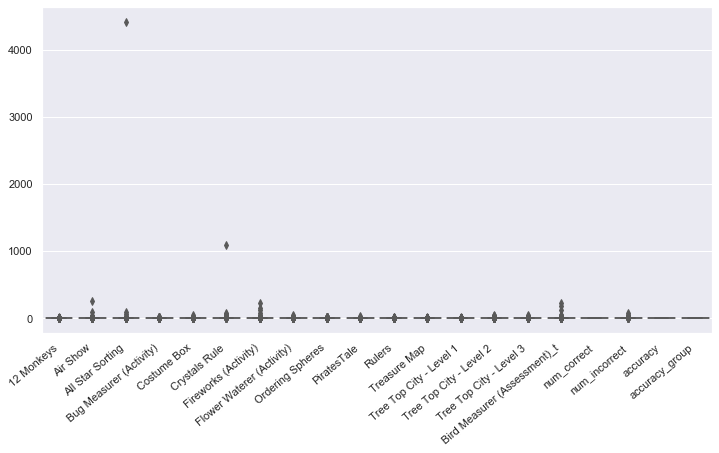

In [218]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=result_bm , orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [219]:
#removing rows , where the user has played a session more than 15 minutes
for i in result_bm.columns:
    if (i!='installation_id'):
        result_bm=result_bm[result_bm[i]<=15]
print(result_bm.shape)

(1481, 21)


In [220]:
result_bm.describe()

,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Bird Measurer (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
count,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000
mean,0.568535,1.281833,0.951108,1.000020,0.534099,1.215144,0.813986,0.973753,0.829845,0.587441,0.580689,0.468602,1.062120,1.284943,1.209993,1.407427,0.715057,2.879811,0.403918,1.386226
std,0.914335,1.746922,1.338050,1.210936,0.988627,1.685680,1.032363,1.411191,1.351456,0.966649,1.018281,0.798982,0.938762,1.262707,1.095967,1.082011,0.451540,3.291944,0.388298,1.149347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.780000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.550000,0.520000,0.940000,0.000000,0.105000,0.670000,0.530000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.170000,1.000000,2.000000,0.333000,1.000000
75%,1.000000,2.290000,1.475000,1.495000,1.000000,2.500000,1.210000,1.490000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.710000,1.000000,4.000000,1.000000,3.000000
max,8.000000,14.820000,10.470000,12.373000,12.000000,13.795000,12.910000,11.580000,14.000000,13.000000,13.000000,9.000000,10.000000,13.000000,14.000000,12.320000,1.000000,15.000000,1.000000,3.000000


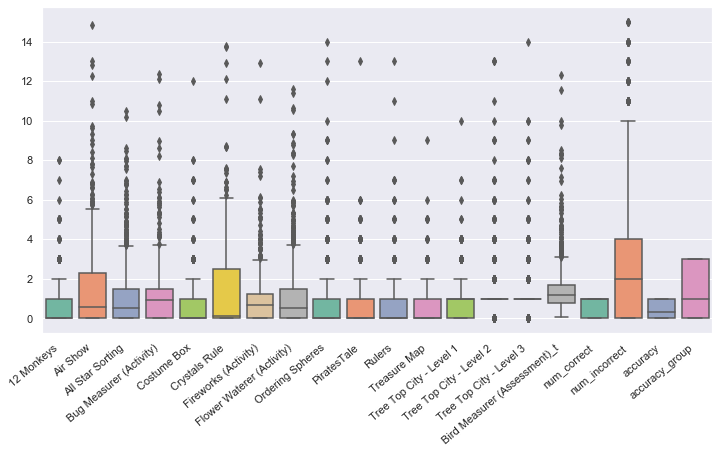

In [221]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=result_bm , orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

# Mushroom Sorter (Assessment)

In [222]:
# removing the installation_id in df which do not have accuracy group(grades) in score-dataframe
id=score_ms['installation_id'].unique()
df_ms=df[df.installation_id.isin(id)]
df_ms.shape

(1933504, 11)

In [223]:
#number of unique installation_id in df after removing id without accuracy group
# is equal to number of unique installation id in score
print(df_ms['installation_id'].nunique())
print(score_ms['installation_id'].nunique())

1990
1990


## Calculating Number of Session

***Number of times each user has played a lesson before taking first Assessment***

In [224]:
# A user can take assessment multiple times.
#Score dataframe gives Accuracy_group (grades) only for few of the assessments
# Assessment without accuracy_group will not be useful for modelling
#Hence creating a new dataframe which has game_sessions specified in score dataframe
gs=score_bm['game_session'].unique()
time=df_ms[df_ms.game_session.isin(gs)]
time.shape

(158028, 11)

In [225]:
# creating a new dataframe with installation_id,game_session of asssessment, maximum timestamp of assessment in df  
ts_gs=time.groupby(['installation_id','game_session']).timestamp.max()
ts_gs=pd.DataFrame(ts_gs)
ts_gs.head()

timestamp
installation_id game_session                                     
0006a69f        77b8ee947eb84b4e 2019-08-06 05:36:51.915000+00:00
                a9ef3ecb3d1acc6a 2019-08-06 20:50:35.426000+00:00
0006c192        957406a905d59afd 2019-10-01 01:02:46.523000+00:00
001d0ed0        7b536271e99518f0 2019-09-05 14:08:17.575000+00:00
002db7e3        5025f22d6e944533 2019-08-12 19:32:35.990000+00:00

In [226]:
#reset index 
ts_gs.reset_index(inplace=True)
ts_gs.rename(columns={'timestamp': 'ts'}, inplace=True)
ts_gs.head()

,installation_id,game_session,ts
0,0006a69f,77b8ee947eb84b4e,2019-08-06 05:36:51.915000+00:00
1,0006a69f,a9ef3ecb3d1acc6a,2019-08-06 20:50:35.426000+00:00
2,0006c192,957406a905d59afd,2019-10-01 01:02:46.523000+00:00
3,001d0ed0,7b536271e99518f0,2019-09-05 14:08:17.575000+00:00
4,002db7e3,5025f22d6e944533,2019-08-12 19:32:35.990000+00:00


In [227]:
# retaining only one game_session per installation_id
# considering only the first assessment taken by installation_id
# timestamp (.min) will give the first assessment taken by user
ts=ts_gs.groupby('installation_id').ts.min()
ts=pd.DataFrame(ts)
ts.reset_index(inplace=True)

In [228]:
print(ts.shape)
ts.head()

(1276, 2)


,installation_id,ts
0,0006a69f,2019-08-06 05:36:51.915000+00:00
1,0006c192,2019-10-01 01:02:46.523000+00:00
2,001d0ed0,2019-09-05 14:08:17.575000+00:00
3,002db7e3,2019-08-08 00:02:14.947000+00:00
4,003372b0,2019-09-26 13:35:43.361000+00:00


In [229]:
#score_ts - ts and game_session of first assessment taken by installation_id
score_ts=ts.merge(ts_gs) #merging the ts and ts_gs 
print(score_ts.shape)
score_ts.head(2)

(1276, 3)


,installation_id,ts,game_session
0,0006a69f,2019-08-06 05:36:51.915000+00:00,77b8ee947eb84b4e
1,0006c192,2019-10-01 01:02:46.523000+00:00,957406a905d59afd


In [230]:
#final score dataframe-which has all the information about first assessment taken by each installation_id
final_score_ms=pd.merge(score,score_ts)
print(final_score_ms.shape)
final_score_ms.head(2)

(1276, 8)


,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group,ts
0,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0,2019-08-06 05:36:51.915000+00:00
1,957406a905d59afd,0006c192,Bird Measurer (Assessment),1,1,0.5,2,2019-10-01 01:02:46.523000+00:00


In [231]:
#the number of rows is equal to unique installation_id (one row per installation_id)
final_score_ms['installation_id'].nunique()

1276

In [232]:
# dropping the column -title (as its value is  same for all the rows) and 
# game_session and ts,which is not needed anymore
final_score_ms.drop(columns=['title','game_session','ts'],inplace=True)
final_score_ms.head()

,installation_id,num_correct,num_incorrect,accuracy,accuracy_group
0,0006a69f,0,11,0.000000,0
1,0006c192,1,1,0.500000,2
2,001d0ed0,0,5,0.000000,0
3,002db7e3,1,10,0.090909,1
4,003372b0,1,1,0.500000,2


In [233]:
# merging timestamp dataframe with first assessment to original df_ms dataframe
final_ms=pd.merge(df_ms,ts)#merging df_ms and ts dataframe
print(final_ms.shape)
final_ms.head(2)

(1531345, 12)


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,ts
0,27253bdc,d3ffed2d2d77597d,2019-08-06 05:07:33.207000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Tree Top City - Level 1,Clip,TREETOPCITY,2019-08-06 05:36:51.915000+00:00
1,27253bdc,e882eb6760063bb1,2019-08-06 05:07:58.484000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Ordering Spheres,Clip,TREETOPCITY,2019-08-06 05:36:51.915000+00:00


In [234]:
#retaining only the lesson done before the first assessment
final_ms=final_ms[final_ms['timestamp']<=final_ms['ts']]

In [235]:
# creating a new dataframe by grouping installation_id and title 
#to get the count of number of sessions played by each user
final_df_ms=final_ms.groupby(['installation_id','title']).game_session.nunique().unstack()
final_df_ms=pd.DataFrame(final_df_ms)
print(final_df_ms.shape)
final_df_ms.head()

(1276, 17)


title,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3
installation_id,,,,,,,,,,,,,,,,,
0006a69f,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0006c192,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0
001d0ed0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0
002db7e3,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0,2.0,2.0
003372b0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0


In [236]:
#reset index
final_df_ms=final_df_ms.reset_index()
final_df_ms.head(1)

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3
0,0006a69f,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [237]:
final_df_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 18 columns):
installation_id                 1276 non-null object
12 Monkeys                      570 non-null float64
Air Show                        782 non-null float64
All Star Sorting                770 non-null float64
Bird Measurer (Assessment)      1276 non-null float64
Bug Measurer (Activity)         849 non-null float64
Costume Box                     520 non-null float64
Crystals Rule                   753 non-null float64
Fireworks (Activity)            904 non-null float64
Flower Waterer (Activity)       795 non-null float64
Mushroom Sorter (Assessment)    1134 non-null float64
Ordering Spheres                657 non-null float64
Pirate's Tale                   592 non-null float64
Rulers                          545 non-null float64
Treasure Map                    505 non-null float64
Tree Top City - Level 1         1022 non-null float64
Tree Top City - Level 2         1151 non-n

In [238]:
# filling all na with 0, because the user has not attempted the lesson
final_df_ms.fillna(0, inplace=True)


In [239]:
#converting the float columns into integer
numerical_columns=[col for col in final_df_ms.columns if final_df_ms[col].dtype != 'O']
for x in numerical_columns:
    final_df_ms[x]=final_df_ms[x].astype(int)
final_df_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 18 columns):
installation_id                 1276 non-null object
12 Monkeys                      1276 non-null int64
Air Show                        1276 non-null int64
All Star Sorting                1276 non-null int64
Bird Measurer (Assessment)      1276 non-null int64
Bug Measurer (Activity)         1276 non-null int64
Costume Box                     1276 non-null int64
Crystals Rule                   1276 non-null int64
Fireworks (Activity)            1276 non-null int64
Flower Waterer (Activity)       1276 non-null int64
Mushroom Sorter (Assessment)    1276 non-null int64
Ordering Spheres                1276 non-null int64
Pirate's Tale                   1276 non-null int64
Rulers                          1276 non-null int64
Treasure Map                    1276 non-null int64
Tree Top City - Level 1         1276 non-null int64
Tree Top City - Level 2         1276 non-null int64
Tree Top

In [240]:
# dropping the column -'Bird Measurer (Assessment)','Mushroom Sorter (Assessment)' which gives the count of number of assessment taken by user,
# as only the first assessment is considered
final_df_ms.drop(columns=['Bird Measurer (Assessment)','Mushroom Sorter (Assessment)'],inplace=True)


In [241]:
final_df_ms.head()

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3
0,0006a69f,1,1,3,1,2,1,1,1,1,1,1,1,1,1,1
1,0006c192,1,0,0,1,0,1,0,1,1,1,3,1,3,1,1
2,001d0ed0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,1
3,002db7e3,0,1,1,1,0,0,1,1,1,0,0,0,2,2,2
4,003372b0,2,1,1,1,1,1,1,1,2,1,1,2,1,1,1


## Calculating Game time of Session

***Time for each lesson per user, before taking first Assessment***

In [242]:
#calculating the game time for each title
final_gt_ms=final_ms.groupby(['installation_id','game_session','title']).game_time.max().unstack()
final_gt_ms=pd.DataFrame(final_gt_ms)
print(final_gt_ms.shape)

(20293, 17)


In [243]:
final_gt_ms.head()

title                             12 Monkeys  Air Show  All Star Sorting  \
installation_id game_session                                               
0006a69f        05921a6eb858eeba NaN         NaN       NaN                 
                1dd51df3dd28e7e0 NaN         NaN       NaN                 
                2ecc82dcd2847233 NaN         NaN       NaN                 
                3422611c17545edd NaN         NaN        99949.0            
                3d0c9e1bbd48eacf NaN         NaN       NaN                 

title                             Bird Measurer (Assessment)  \
installation_id game_session                                   
0006a69f        05921a6eb858eeba NaN                           
                1dd51df3dd28e7e0 NaN                           
                2ecc82dcd2847233 NaN                           
                3422611c17545edd NaN                           
                3d0c9e1bbd48eacf NaN                           

title                             Bug Measurer (Activity)  Costume Box  \
installation_id game_session                                             
0006a69f        05921a6eb858eeba NaN                      NaN            
                1dd51df3dd28e7e0 NaN                       0.0           
                2ecc82dcd2847233  104816.0                NaN            
                3422611c17545edd NaN                      NaN            
                3d0c9e1bbd48eacf NaN                      NaN            

title                             Crystals Rule  Fireworks (Activity)  \
installation_id game_session                                            
0006a69f        05921a6eb858eeba NaN             91508.0                
                1dd51df3dd28e7e0 NaN            NaN                     
                2ecc82dcd2847233 NaN            NaN                     
                3422611c17545edd NaN            NaN                     
                3d0c9e1bbd48eacf NaN            NaN                     

title                             Flower Waterer (Activity)  \
installation_id game_session                                  
0006a69f        05921a6eb858eeba NaN                          
                1dd51df3dd28e7e0 NaN                          
                2ecc82dcd2847233 NaN                          
                3422611c17545edd NaN                          
                3d0c9e1bbd48eacf NaN                          

title                             Mushroom Sorter (Assessment)  \
installation_id game_session                                     
0006a69f        05921a6eb858eeba NaN                             
                1dd51df3dd28e7e0 NaN                             
                2ecc82dcd2847233 NaN                             
                3422611c17545edd NaN                             
                3d0c9e1bbd48eacf NaN                             

title                             Ordering Spheres  Pirate's Tale  Rulers  \
installation_id game_session                                                
0006a69f        05921a6eb858eeba NaN               NaN            NaN       
                1dd51df3dd28e7e0 NaN               NaN            NaN       
                2ecc82dcd2847233 NaN               NaN            NaN       
                3422611c17545edd NaN               NaN            NaN       
                3d0c9e1bbd48eacf NaN                0.0           NaN       

title                             Treasure Map  Tree Top City - Level 1  \
installation_id game_session                                              
0006a69f        05921a6eb858eeba NaN           NaN                        
                1dd51df3dd28e7e0 NaN           NaN                        
                2ecc82dcd2847233 NaN           NaN                        
                3422611c17545edd NaN           NaN                        
                3d0c9e1bbd48eacf NaN           NaN                        

title           

In [244]:
# filling all na with 0, because the user has not attempted the lesson
final_gt_ms.fillna(0, inplace=True)

In [245]:
#reset index
final_gt_ms=final_gt_ms.reset_index()
final_gt_ms.head()

title,installation_id,game_session,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3
0,0006a69f,05921a6eb858eeba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0006a69f,1dd51df3dd28e7e0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0006a69f,2ecc82dcd2847233,0.0,0.0,0.0,0.0,104816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0006a69f,3422611c17545edd,0.0,0.0,99949.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0006a69f,3d0c9e1bbd48eacf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
#renaming column
final_gt_ms.rename(columns={'Pirate\'s Tale': 'PiratesTale'},inplace=True)

In [247]:
#calculating the total gametime
final_gt_ms=final_gt_ms.groupby(['installation_id'])['game_session', '12 Monkeys', 'Air Show',
       'All Star Sorting', 'Bird Measurer (Assessment)',
       'Bug Measurer (Activity)', 'Costume Box', 'Crystals Rule',
       'Fireworks (Activity)', 'Flower Waterer (Activity)',
       'Mushroom Sorter (Assessment)', 'Ordering Spheres', 'PiratesTale',
       'Rulers', 'Treasure Map', 'Tree Top City - Level 1',
       'Tree Top City - Level 2', 'Tree Top City - Level 3'].sum()

In [248]:
final_gt_ms=final_gt_ms.reset_index()

In [249]:
final_gt_ms.head()

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3
0,0006a69f,0.0,193134.0,164777.0,92799.0,104816.0,0.0,78843.0,91508.0,164673.0,39803.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0006c192,0.0,0.0,0.0,216374.0,79039.0,0.0,11949.0,0.0,267890.0,91828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001d0ed0,0.0,0.0,0.0,52719.0,0.0,0.0,0.0,0.0,0.0,82708.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,002db7e3,0.0,186634.0,74458.0,137104.0,79660.0,0.0,0.0,36168.0,42495.0,52056.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,003372b0,0.0,164947.0,76591.0,49573.0,72048.0,0.0,199194.0,85592.0,47556.0,34504.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [250]:
final_gt_ms[final_gt_ms['12 Monkeys']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [251]:
final_gt_ms[final_gt_ms['Tree Top City - Level 1']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [252]:
final_gt_ms[final_gt_ms['Costume Box']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [253]:
final_gt_ms[final_gt_ms['Ordering Spheres']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [254]:
final_gt_ms[final_gt_ms['PiratesTale']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [255]:
final_gt_ms[final_gt_ms['Rulers']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [256]:
final_gt_ms[final_gt_ms['Treasure Map']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [257]:
final_gt_ms[final_gt_ms['Tree Top City - Level 2']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [258]:
final_gt_ms[final_gt_ms['Tree Top City - Level 3']>0]

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bird Measurer (Assessment),Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3


In [259]:
#dropping the columns, as game_time is zero for all rows
#dropping Bird Measurer (Assessment) as its not relevant
final_gt_ms.drop(columns=['12 Monkeys','Costume Box','Ordering Spheres','PiratesTale','Rulers','Treasure Map','Tree Top City - Level 1','Tree Top City - Level 2','Tree Top City - Level 3','Bird Measurer (Assessment)'],inplace=True)

In [260]:
#converting the gametime from milliseconds to minutes
for i in final_gt_ms.columns:
    if i!='installation_id':
        final_gt_ms[i]=round(final_gt_ms[i]/60000,2)

In [261]:
final_gt_ms.head()

title,installation_id,Air Show,All Star Sorting,Bug Measurer (Activity),Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Mushroom Sorter (Assessment)
0,0006a69f,3.22,2.75,1.75,1.31,1.53,2.74,0.66
1,0006c192,0.00,0.00,1.32,0.20,0.00,4.46,1.53
2,001d0ed0,0.00,0.00,0.00,0.00,0.00,0.00,1.38
3,002db7e3,3.11,1.24,1.33,0.00,0.60,0.71,0.87
4,003372b0,2.75,1.28,1.20,3.32,1.43,0.79,0.58


In [262]:
#adding '_t' to all column names ,to merge with final_df dataframe
for i in final_gt_ms.columns:
    if i!='installation_id':
        final_gt_ms.rename(columns={i: i+'_t'},inplace=True)

In [263]:
#merging the two dataframe into final dataframe
final_ms=pd.merge(final_df_ms,final_gt_ms)

In [264]:
final_ms.head()

title,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Air Show_t,All Star Sorting_t,Bug Measurer (Activity)_t,Crystals Rule_t,Fireworks (Activity)_t,Flower Waterer (Activity)_t,Mushroom Sorter (Assessment)_t
0,0006a69f,1,1,3,1,2,1,1,1,1,1,1,1,1,1,1,3.22,2.75,1.75,1.31,1.53,2.74,0.66
1,0006c192,1,0,0,1,0,1,0,1,1,1,3,1,3,1,1,0.00,0.00,1.32,0.20,0.00,4.46,1.53
2,001d0ed0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,1.38
3,002db7e3,0,1,1,1,0,0,1,1,1,0,0,0,2,2,2,3.11,1.24,1.33,0.00,0.60,0.71,0.87
4,003372b0,2,1,1,1,1,1,1,1,2,1,1,2,1,1,1,2.75,1.28,1.20,3.32,1.43,0.79,0.58


In [265]:
final_ms.shape

(1276, 23)

In [266]:
#merging the final dataframes into result 

result_ms=pd.merge(final_ms,final_score_ms)
print(result_ms.shape)
result_ms.head()

(1276, 27)


,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,Pirate's Tale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Air Show_t,All Star Sorting_t,Bug Measurer (Activity)_t,Crystals Rule_t,Fireworks (Activity)_t,Flower Waterer (Activity)_t,Mushroom Sorter (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,0006a69f,1,1,3,1,2,1,1,1,1,1,1,1,1,1,1,3.22,2.75,1.75,1.31,1.53,2.74,0.66,0,11,0.000000,0
1,0006c192,1,0,0,1,0,1,0,1,1,1,3,1,3,1,1,0.00,0.00,1.32,0.20,0.00,4.46,1.53,1,1,0.500000,2
2,001d0ed0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,1.38,0,5,0.000000,0
3,002db7e3,0,1,1,1,0,0,1,1,1,0,0,0,2,2,2,3.11,1.24,1.33,0.00,0.60,0.71,0.87,1,10,0.090909,1
4,003372b0,2,1,1,1,1,1,1,1,2,1,1,2,1,1,1,2.75,1.28,1.20,3.32,1.43,0.79,0.58,1,1,0.500000,2


In [267]:
#renaming the column
result_ms.rename(columns={'Pirate\'s Tale': 'PiratesTale'},inplace=True)

## Calculating Game time per Session

***Game time per lesson for each user***

In [268]:
result_ms.columns

Index(['installation_id', '12 Monkeys', 'Air Show', 'All Star Sorting',
       'Bug Measurer (Activity)', 'Costume Box', 'Crystals Rule',
       'Fireworks (Activity)', 'Flower Waterer (Activity)', 'Ordering Spheres',
       'PiratesTale', 'Rulers', 'Treasure Map', 'Tree Top City - Level 1',
       'Tree Top City - Level 2', 'Tree Top City - Level 3', 'Air Show_t',
       'All Star Sorting_t', 'Bug Measurer (Activity)_t', 'Crystals Rule_t',
       'Fireworks (Activity)_t', 'Flower Waterer (Activity)_t',
       'Mushroom Sorter (Assessment)_t', 'num_correct', 'num_incorrect',
       'accuracy', 'accuracy_group'],
      dtype='object')

In [269]:
result_ms['Air Show']=result_ms['Air Show_t']/result_ms['Air Show']
result_ms['All Star Sorting']=result_ms['All Star Sorting_t']/result_ms['All Star Sorting']
result_ms['Bug Measurer (Activity)']=result_ms['Bug Measurer (Activity)_t']/result_ms['Bug Measurer (Activity)']
result_ms['Crystals Rule']=result_ms['Crystals Rule_t']/result_ms['Crystals Rule']
result_ms['Fireworks (Activity)']=result_ms['Fireworks (Activity)_t']/result_ms['Fireworks (Activity)']
result_ms['Flower Waterer (Activity)']=result_ms['Flower Waterer (Activity)_t']/result_ms['Flower Waterer (Activity)']


In [270]:
#dropping unwanted columns
result_ms.drop(columns=['Air Show_t','All Star Sorting_t',
       'Bug Measurer (Activity)_t', 'Crystals Rule_t',
       'Fireworks (Activity)_t', 'Flower Waterer (Activity)_t'],inplace=True)

In [271]:
# filling all na and inf with 0, because the user has not attempted the lesson
# result.replace([np.inf], np.nan,inplace=True)
result_ms.fillna(0, inplace=True)

In [272]:
result_ms.isnull().sum()

installation_id                   0
12 Monkeys                        0
Air Show                          0
All Star Sorting                  0
Bug Measurer (Activity)           0
Costume Box                       0
Crystals Rule                     0
Fireworks (Activity)              0
Flower Waterer (Activity)         0
Ordering Spheres                  0
PiratesTale                       0
Rulers                            0
Treasure Map                      0
Tree Top City - Level 1           0
Tree Top City - Level 2           0
Tree Top City - Level 3           0
Mushroom Sorter (Assessment)_t    0
num_correct                       0
num_incorrect                     0
accuracy                          0
accuracy_group                    0
dtype: int64

In [273]:
result_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 21 columns):
installation_id                   1276 non-null object
12 Monkeys                        1276 non-null int64
Air Show                          1276 non-null float64
All Star Sorting                  1276 non-null float64
Bug Measurer (Activity)           1276 non-null float64
Costume Box                       1276 non-null int64
Crystals Rule                     1276 non-null float64
Fireworks (Activity)              1276 non-null float64
Flower Waterer (Activity)         1276 non-null float64
Ordering Spheres                  1276 non-null int64
PiratesTale                       1276 non-null int64
Rulers                            1276 non-null int64
Treasure Map                      1276 non-null int64
Tree Top City - Level 1           1276 non-null int64
Tree Top City - Level 2           1276 non-null int64
Tree Top City - Level 3           1276 non-null int64
Mushroom Sorter 

In [274]:
#rounding the values to 3 digits
for i in result_ms.columns:
    if (i!='installation_id'):
        result_ms[i]=round(result_ms[i],3)

In [275]:
result_ms.head()

,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Mushroom Sorter (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,0006a69f,1,3.22,0.917,1.75,2,1.31,1.53,2.74,1,1,1,1,1,1,1,0.66,0,11,0.000,0
1,0006c192,1,0.00,0.000,1.32,0,0.20,0.00,4.46,1,1,3,1,3,1,1,1.53,1,1,0.500,2
2,001d0ed0,0,0.00,0.000,0.00,0,0.00,0.00,0.00,2,1,2,1,1,1,1,1.38,0,5,0.000,0
3,002db7e3,0,3.11,1.240,1.33,0,0.00,0.60,0.71,1,0,0,0,2,2,2,0.87,1,10,0.091,1
4,003372b0,2,2.75,1.280,1.20,1,3.32,1.43,0.79,2,1,1,2,1,1,1,0.58,1,1,0.500,2


## Removing Outliers

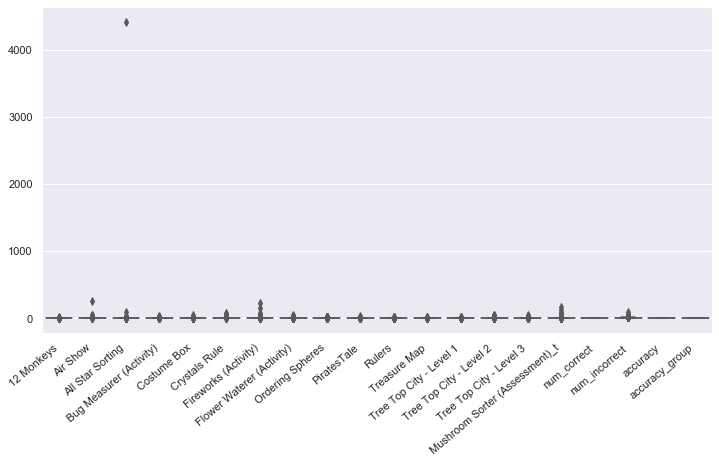

In [276]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=result_ms , orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [277]:
#removing rows , where the user has played a session more than 15 minutes
for i in result_ms.columns:
    if (i!='installation_id'):
        result_ms=result_ms[result_ms[i]<=15]
print(result_ms.shape) 

(1186, 21)


In [278]:
result_ms.describe()

,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Mushroom Sorter (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
count,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,0.623103,1.450916,1.044173,1.049823,0.590219,1.363731,0.907766,1.085559,0.879427,0.652614,0.600337,0.515177,1.142496,1.365936,1.273187,0.838162,0.745363,2.813659,0.424079,1.451939
std,0.916113,1.777150,1.352781,1.230088,1.031506,1.752746,1.048748,1.373312,1.380319,0.940813,1.037101,0.818678,0.933628,1.158780,1.052017,0.959024,0.435841,3.303472,0.386250,1.136937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.470000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.930000,0.810000,1.010000,0.000000,0.479000,0.790000,0.815000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.630000,1.000000,2.000000,0.333000,1.000000
75%,1.000000,2.500000,1.550000,1.510000,1.000000,2.607500,1.307500,1.640000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.990000,1.000000,4.000000,1.000000,3.000000
max,8.000000,14.820000,10.470000,12.373000,12.000000,13.795000,12.910000,11.420000,14.000000,6.000000,13.000000,9.000000,10.000000,13.000000,14.000000,14.010000,1.000000,15.000000,1.000000,3.000000


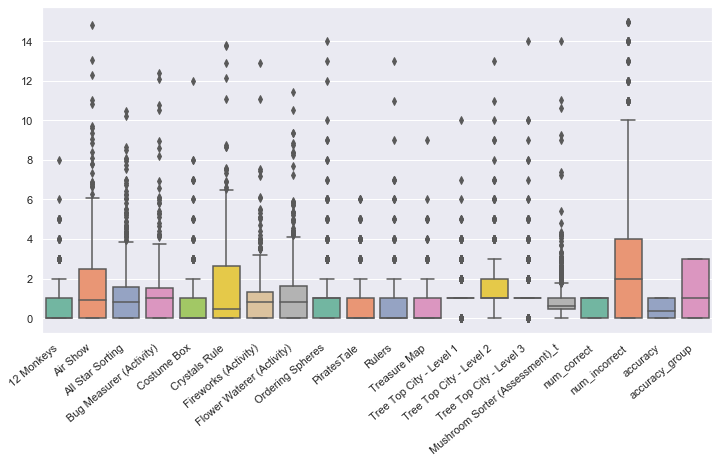

In [279]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=result_ms , orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [280]:
# joining the two assessments into a singale df
print(result_ms.shape)
print(result_bm.shape)
result = pd.concat([result_ms, result_bm],  sort =False)
print(result.shape)

(1186, 21)
(1481, 21)
(2667, 22)


In [281]:
result.head()

,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Mushroom Sorter (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group,Bird Measurer (Assessment)_t
0,0006a69f,1,3.22,0.917,1.75,2,1.31,1.53,2.74,1,1,1,1,1,1,1,0.66,0,11,0.000,0,NaN
1,0006c192,1,0.00,0.000,1.32,0,0.20,0.00,4.46,1,1,3,1,3,1,1,1.53,1,1,0.500,2,NaN
2,001d0ed0,0,0.00,0.000,0.00,0,0.00,0.00,0.00,2,1,2,1,1,1,1,1.38,0,5,0.000,0,NaN
3,002db7e3,0,3.11,1.240,1.33,0,0.00,0.60,0.71,1,0,0,0,2,2,2,0.87,1,10,0.091,1,NaN
4,003372b0,2,2.75,1.280,1.20,1,3.32,1.43,0.79,2,1,1,2,1,1,1,0.58,1,1,0.500,2,NaN


In [282]:
result.describe()

,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Mushroom Sorter (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group,Bird Measurer (Assessment)_t
count,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.00000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,1186.000000,2667.000000,2667.000000,2667.000000,2667.000000,1481.000000
mean,0.592801,1.357023,0.992493,1.022167,0.559055,1.281220,0.85569,1.023472,0.851894,0.616423,0.589426,0.489314,1.097863,1.320960,1.238095,0.838162,0.728534,2.850394,0.412884,1.415448,1.407427
std,0.915357,1.762102,1.345164,1.219511,1.008116,1.717092,1.04053,1.395321,1.364332,0.955617,1.026546,0.807979,0.937159,1.218028,1.076902,0.959024,0.444799,3.296621,0.387446,1.144097,1.082011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.470000,0.000000,0.000000,0.000000,0.000000,0.780000
50%,0.000000,0.720000,0.630000,0.970000,0.000000,0.240000,0.73000,0.670000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.630000,1.000000,2.000000,0.333000,1.000000,1.170000
75%,1.000000,2.420000,1.510000,1.500000,1.000000,2.540000,1.24000,1.560000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.990000,1.000000,4.000000,1.000000,3.000000,1.710000
max,8.000000,14.820000,10.470000,12.373000,12.000000,13.795000,12.91000,11.580000,14.000000,13.000000,13.000000,9.000000,10.000000,13.000000,14.000000,14.010000,1.000000,15.000000,1.000000,3.000000,12.320000


In [283]:
result.isnull().sum()

installation_id                   0   
12 Monkeys                        0   
Air Show                          0   
All Star Sorting                  0   
Bug Measurer (Activity)           0   
Costume Box                       0   
Crystals Rule                     0   
Fireworks (Activity)              0   
Flower Waterer (Activity)         0   
Ordering Spheres                  0   
PiratesTale                       0   
Rulers                            0   
Treasure Map                      0   
Tree Top City - Level 1           0   
Tree Top City - Level 2           0   
Tree Top City - Level 3           0   
Mushroom Sorter (Assessment)_t    1481
num_correct                       0   
num_incorrect                     0   
accuracy                          0   
accuracy_group                    0   
Bird Measurer (Assessment)_t      1186
dtype: int64

In [284]:
#as the values for first assessment is only considered,during merging-the other assessment became nan
result.fillna(0, inplace=True)

In [286]:
#save as csv file
result.loc[ :].to_csv('../data/treetopcity_final.csv',index=False)